In [2]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
b = pd.DataFrame(boston.data, columns=boston.feature_names)
b['PRICE'] = boston.target

In [3]:
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

def test_model(model, X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=5)
    model.fit(X_train, Y_train)
    print(f"{type(model).__name__} -> {model.score(X_test, Y_test)}")


def test_classification(X, y):
    classifiers = [
        SGDClassifier(max_iter=100),
        Perceptron(random_state=5),
    ]
    for classifier in classifiers:
        test_model(classifier, X, y)

def test_regression(X, y):
    regressors = [
        LinearRegression(),
        RandomForestRegressor(n_estimators=10)
    ]
    for regressor in regressors:
        test_model(regressor, X, y)


In [5]:
test_regression(b.drop("PRICE", axis=1), b['PRICE'])
test_classification(b.drop("PRICE", axis=1), b['PRICE'])

LinearRegression -> 0.6956551656111606
RandomForestRegressor -> 0.8881813011060293


ValueError: Unknown label type: (array([ 5. ,  5.6,  6.3,  7.2,  7.4,  7.5,  8.4,  8.5,  8.7,  8.8,  9.5,
        9.6, 10.2, 10.4, 10.9, 11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.3,
       12.5, 12.6, 12.7, 12.8, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8,
       13.9, 14.1, 14.3, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.7, 16.8,
       17. , 17.1, 17.2, 17.4, 17.5, 17.7, 17.8, 18. , 18.1, 18.2, 18.3,
       18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4,
       19.5, 19.6, 19.8, 19.9, 20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6,
       20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.4, 21.6, 21.7, 21.8, 21.9,
       22. , 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1,
       23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2,
       24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 25. , 25.2, 26.2, 26.6, 26.7,
       27. , 27.1, 27.5, 28. , 28.1, 28.2, 28.4, 28.5, 28.7, 29. , 29.1,
       29.4, 29.6, 29.8, 29.9, 30.1, 30.7, 30.8, 31.1, 31.2, 31.5, 31.6,
       31.7, 32. , 32.4, 32.5, 32.7, 32.9, 33. , 33.1, 33.2, 33.3, 33.8,
       34.7, 34.9, 35.1, 36. , 36.2, 36.4, 36.5, 37. , 37.2, 37.3, 37.9,
       38.7, 39.8, 41.7, 42.3, 42.8, 43.1, 43.5, 44. , 45.4, 46. , 46.7,
       48.3, 48.5, 50. ]),)

## From continous to discrete

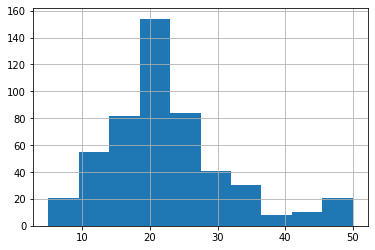

In [5]:
b['PRICE'].hist()

In [15]:
#By range
b['PRICE_CAT'] = pd.cut(b['PRICE'], 3)
b['PRICE_CAT'].value_counts()

(20.0, 35.0]     243
(4.955, 20.0]    215
(35.0, 50.0]      48
Name: PRICE_CAT, dtype: int64

In [17]:
# By percentile (evenly)
b['PRICE_CAT'] = pd.qcut(b['PRICE'], [0, 0.33333, 0.66666, 1], labels=[1,2,3])
b['PRICE_CAT'].value_counts()

2    171
1    169
3    166
Name: PRICE_CAT, dtype: int64

In [21]:
X = b.drop(["PRICE", "PRICE_CAT"], axis=1)
y_r = b['PRICE']
y_c = b['PRICE_CAT']
test_classification(X, y_c)
test_regression(X, y_r)

SGDClassifier -> 0.47904191616766467
Perceptron -> 0.5568862275449101
LinearRegression -> 0.6956551656111594
RandomForestRegressor -> 0.8878466077196002


## Correlative features

In [24]:
b.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


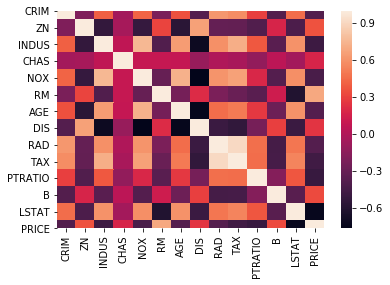

In [25]:
import seaborn as sns
corr = b.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [33]:
test_regression(X.drop("INDUS", axis=1), y_r)
test_regression(X.drop("RAD", axis=1), y_r)
test_regression(X, y_r)

LinearRegression -> 0.6964817441909924
RandomForestRegressor -> 0.8682870411332608
LinearRegression -> 0.6878299157692301
RandomForestRegressor -> 0.876725035912712
LinearRegression -> 0.6956551656111594
RandomForestRegressor -> 0.8753941702703562


### Variance threshold

In [43]:
from sklearn.feature_selection import VarianceThreshold
variance = 0.8
sel = VarianceThreshold(threshold=(variance * (1 - variance))) # CHAS is out!
X_unvarianced = sel.fit_transform(X)

test_regression(X, y_r)
test_regression(X_unvarianced, y_r)

LinearRegression -> 0.6956551656111594
RandomForestRegressor -> 0.8612436734592899
LinearRegression -> 0.6720914428031861
RandomForestRegressor -> 0.878969200516807


### KBest

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

N_FEATURES = 4

# Classification
X_chi = SelectKBest(f_classif, k=N_FEATURES).fit_transform(X, y_c)

X_k_r = SelectKBest(f_regression, k=N_FEATURES).fit_transform(X, y_r)
print(X_k_r.shape)


test_classification(X, y_c)
test_classification(X_chi, y_c)

test_regression(X, y_r)
test_regression(X_k_r, y_r)

(506, 4)
SGDClassifier -> 0.6706586826347305
Perceptron -> 0.5568862275449101
SGDClassifier -> 0.6586826347305389
Perceptron -> 0.6946107784431138
LinearRegression -> 0.6956551656111594
RandomForestRegressor -> 0.8770711120808771
LinearRegression -> 0.6362324453031302
RandomForestRegressor -> 0.7992917787991446


### Taking advantage of a poor RandomForest

In [63]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50, random_state=5)
clf = clf.fit(X, y_c)
print(clf.feature_importances_)

model_c = SelectFromModel(clf, prefit=True)
X_s_m_c = model_c.transform(X)
print(X_s_m_c.shape)


rgr = ExtraTreesRegressor(n_estimators=50, random_state=5)
rgr = rgr.fit(X, y_r)
print(rgr.feature_importances_)

model_r = SelectFromModel(rgr, prefit=True)
X_s_m_r = model_r.transform(X)
print(X_s_m_r.shape)

test_classification(X, y_c)
test_classification(X_s_m_c, y_c)

test_regression(X, y_r)
test_regression(X_s_m_r, y_r)

[0.06366737 0.02260782 0.08011055 0.0141815  0.07238492 0.1500069
 0.10293973 0.08325618 0.06514037 0.0557602  0.04836522 0.06800733
 0.17357193]
(506, 5)
[0.02705873 0.00649405 0.04897753 0.01349967 0.03879031 0.31585283
 0.02148574 0.03283891 0.02009383 0.04095096 0.03720715 0.01997299
 0.3767773 ]
(506, 2)
SGDClassifier -> 0.6167664670658682
Perceptron -> 0.5568862275449101
SGDClassifier -> 0.6766467065868264
Perceptron -> 0.6586826347305389
LinearRegression -> 0.6956551656111594
RandomForestRegressor -> 0.8775661481087961
LinearRegression -> 0.6296344935050338
RandomForestRegressor -> 0.7294405338335453
